In [496]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [497]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io as io
import skimage as ski


In [498]:
M = np.matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9], [0, 2, 2]])
a = np.array([1,1,0])
b = np.array([-1,2,5])
c = np.array([0,2,3,2])

In [499]:
aDotb = np.dot(np.transpose(a), b)
print(aDotb)

1


In [500]:
aProdb = np.multiply(a, b)
print(aProdb)

[-1  2  0]


In [501]:
result = np.dot(np.multiply(aDotb, M), a)
print(result)

[[ 3  9 15  2]]


In [502]:
print(np.dot(M, a))

[[ 3  9 15  2]]


In [503]:
newM = np.multiply(M, a)
print(newM)

[[1 2 0]
 [4 5 0]
 [7 8 0]
 [0 2 0]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[0 0 0 0 0 1 2 2 4 5 7 8]]


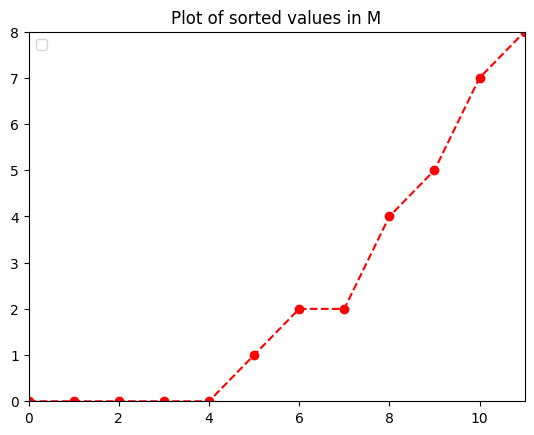

In [504]:
sortedM = np.sort(newM, axis = None)
print(sortedM)

plt.xlabel =("Index")

plt.ylabel =("Values")

plt.title('Plot of sorted values in M')

x = [0,1,2,3,4,5,6,7,8,9,10,11]
y= [0,0,0,0,0,1,2,2,4,5,7,8]

plt.plot(x, y, 'ro--')
plt.legend()
plt.axis([0, 11, 0,8])
plt.show()

PART TWO


In [506]:
img1 = io.imread("image1.jpg")
img2 = io.imread("image2.jpg")

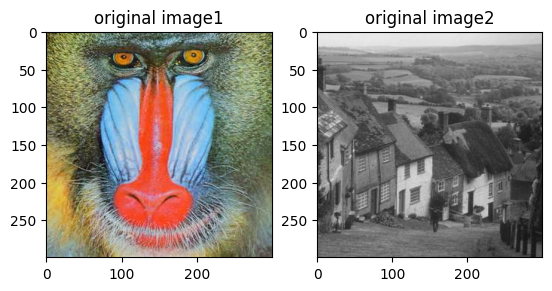

In [507]:
plt.subplot(1, 2, 1)
plt.title("original image1")
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.title("original image2")
plt.imshow(img2)
plt.show()

In [508]:
def min_max_scaling(img):
    min_pixel = np.min(img)
    max_pixel = np.max(img)
    return (img - min_pixel) / (max_pixel - min_pixel)


img1 = img1.astype('float')
img2 = img2.astype('float')

img1 = min_max_scaling(img1)
img2 = min_max_scaling(img2)

print(img1)

[[[0.35686275 0.32156863 0.09803922]
  [0.31764706 0.28235294 0.06666667]
  [0.36862745 0.32941176 0.12941176]
  ...
  [0.43529412 0.43921569 0.31372549]
  [0.41568627 0.43137255 0.29411765]
  [0.37647059 0.39215686 0.25490196]]

 [[0.35686275 0.32156863 0.09803922]
  [0.37647059 0.34117647 0.1254902 ]
  [0.40392157 0.36470588 0.16470588]
  ...
  [0.42352941 0.42745098 0.29411765]
  [0.41568627 0.43137255 0.29411765]
  [0.43921569 0.45490196 0.30980392]]

 [[0.41176471 0.37647059 0.14509804]
  [0.4        0.36470588 0.14117647]
  [0.34117647 0.30196078 0.09411765]
  ...
  [0.34901961 0.36470588 0.21960784]
  [0.26666667 0.28235294 0.1372549 ]
  [0.30196078 0.32156863 0.16470588]]

 ...

 [[0.49803922 0.58431373 0.57254902]
  [0.5254902  0.62352941 0.61176471]
  [0.49411765 0.58823529 0.58823529]
  ...
  [0.38431373 0.36470588 0.34117647]
  [0.39607843 0.37647059 0.35294118]
  [0.39607843 0.37647059 0.35294118]]

 [[0.51372549 0.61176471 0.6       ]
  [0.54117647 0.63921569 0.62745098]


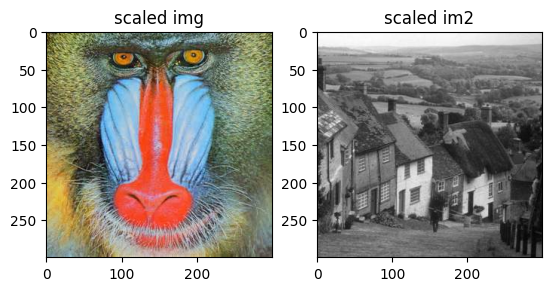

In [509]:
plt.subplot(1, 2, 1)
plt.title("scaled img")
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.title("scaled im2")
plt.imshow(img2)
plt.show()

In [510]:
img1_new = ski.util.img_as_float64(img1) #this does the code above too

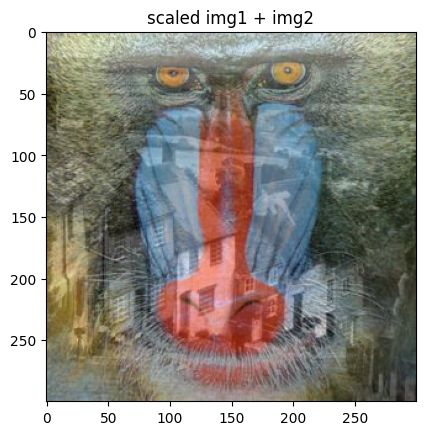

In [511]:
img3 = img1 + img2
img3 = min_max_scaling(img3)

plt.title("scaled img1 + img2")
plt.imshow(img3)
plt.show()

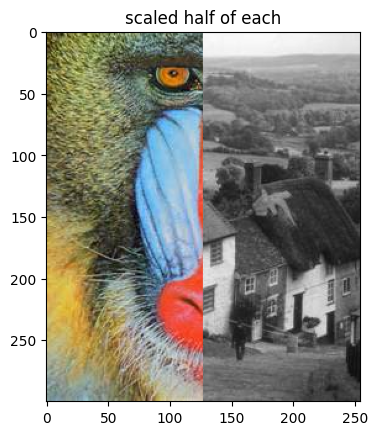

In [512]:
imgLeft = np.split(img1, [127,255], axis=1)
imgRight = np.split(img2, [127,255], axis=1)

img4 = np.concatenate((imgLeft[0], imgRight[1]), axis = 1)

plt.title("scaled half of each")
plt.imshow(img4)
plt.show()

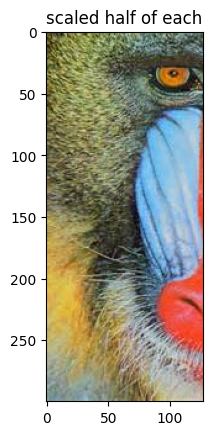

In [513]:
img5 = img1[:, :127]
plt.title("scaled half of each")
plt.imshow(img5)
plt.show()

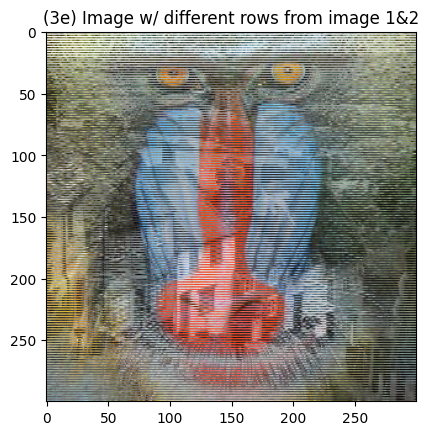

In [514]:
imageShape = np.shape(img1)
row = np.shape(img1)[0]
newImage2 = None
newImage2 = np.zeros(imageShape)
for i in range(row):
    if i % 2 == 0:
        newImage2[i] = img2[i] # even numbered row from image2
    else:
        newImage2[i] = img1[i] # odd numbered row from image1

plt.title("(3e) Image w/ different rows from image 1&2")
plt.imshow(newImage2)
plt.show()  

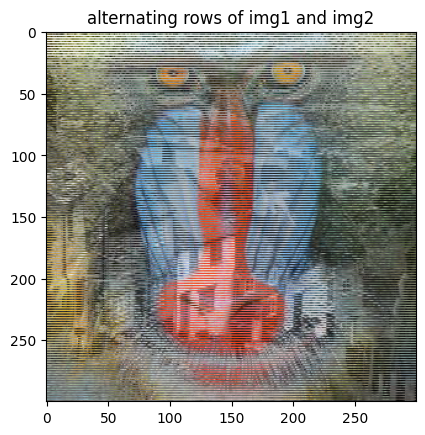

In [515]:
img1N = img1
img2N = img2

for i in range(len(img1)):
    if(i % 2 == 1):
        img1N[i] = np.zeros(3)

for i in range(len(img2)):
    if(i % 2 == 0):
        img2N[i] = np.zeros(3)

img6 = img1N + img2N

plt.title("alternating rows of img1 and img2")
plt.imshow(img6)
plt.show()


(2, 1, 3)


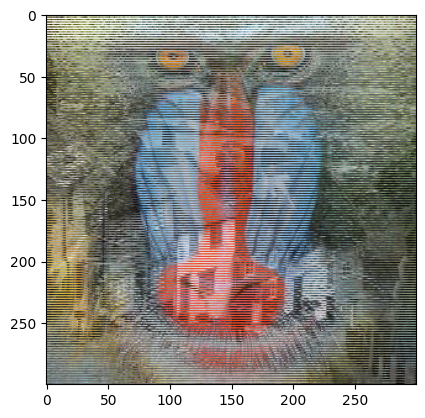

In [516]:
col = np.shape(img1)[1]
newImage3 = None
#adding the array of zeroes to the array of ones in a row like fashion
oddMask = np.concatenate((np.ones((1, 1, 3)), np.zeros((1, 1, 3))), axis=0)
evenMask = np.concatenate((np.zeros((1,1,3)), np.ones((1, 1, 3))), axis=0)
print(oddMask.shape)
oddFilter = np.tile(oddMask, (int(row/2), col, 1))
evenFilter = np.tile(evenMask, (int(row/2), col, 1))

newImage3 = np.multiply(img1, oddFilter) + np.multiply(img2, evenFilter)

plt.imshow(newImage3)
plt.show()

In [517]:
print(newImage3)

[[[0.35686275 0.32156863 0.09803922]
  [0.31764706 0.28235294 0.06666667]
  [0.36862745 0.32941176 0.12941176]
  ...
  [0.43529412 0.43921569 0.31372549]
  [0.41568627 0.43137255 0.29411765]
  [0.37647059 0.39215686 0.25490196]]

 [[0.97272727 0.97272727 0.97272727]
  [0.97272727 0.97272727 0.97272727]
  [0.97727273 0.97727273 0.97727273]
  ...
  [0.83181818 0.83181818 0.83181818]
  [0.83181818 0.83181818 0.83181818]
  [0.83181818 0.83181818 0.83181818]]

 [[0.41176471 0.37647059 0.14509804]
  [0.4        0.36470588 0.14117647]
  [0.34117647 0.30196078 0.09411765]
  ...
  [0.34901961 0.36470588 0.21960784]
  [0.26666667 0.28235294 0.1372549 ]
  [0.30196078 0.32156863 0.16470588]]

 ...

 [[0.40909091 0.40909091 0.40909091]
  [0.40909091 0.40909091 0.40909091]
  [0.41363636 0.41363636 0.41363636]
  ...
  [0.34090909 0.34090909 0.34090909]
  [0.25909091 0.25909091 0.25909091]
  [0.07272727 0.07272727 0.07272727]]

 [[0.51372549 0.61176471 0.6       ]
  [0.54117647 0.63921569 0.62745098]


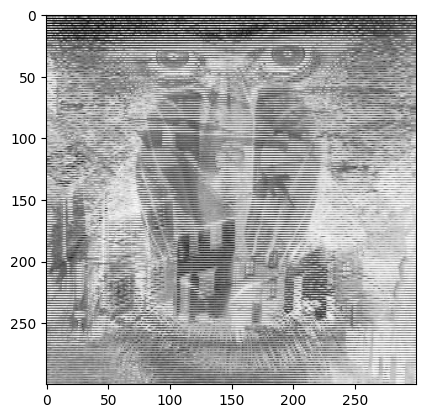

In [523]:
def convert_to_grayscale(img):
    grayscale_image = np.zeros((row, col))
    grayscale_tile = np.array([[[0.299, 0.587, 0.114]]])
    grayscale_matrix = np.tile(grayscale_tile, (row, col, 1))
    img = np.multiply(img, grayscale_matrix) #hadamard product which is element wise multiplication of matrices/vectors
    for i in range(len(img)):
        for j in range(len(img[i])):
            grayscale_image[i][j] = img[i][j][0] + img[i][j][1] + img[i][j][2]
    return grayscale_image

grayscale_img3 = convert_to_grayscale(newImage3)
plt.imshow(grayscale_img3, cmap=plt.cm.Greys)
plt.show()




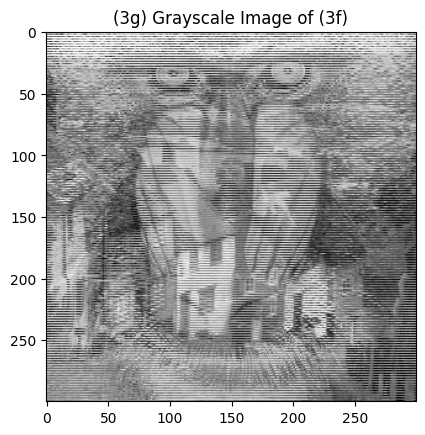

In [519]:
def rgb2gray(pixel):
    return 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]

# Convert the image
newImage4 = np.zeros((newImage3.shape[0], newImage3.shape[1])) # init 2D numpy array
for r in range(len(newImage3)):
   for c in range(len(newImage3[r])):
      newImage4[r][c] = rgb2gray(newImage3[r][c])

plt.title("(3g) Grayscale Image of (3f)")
plt.imshow(newImage4, cmap=plt.cm.Greys_r)
plt.show()

In [520]:
print(newImage4)

[[0.30663922 0.26831765 0.31833725 ... 0.42373725 0.41103529 0.37181961]
 [0.97272727 0.97272727 0.97727273 ... 0.83181818 0.83181818 0.83181818]
 [0.36064706 0.34977647 0.28999216 ... 0.34347451 0.26112157 0.29782353]
 ...
 [0.40909091 0.40909091 0.41363636 ... 0.34090909 0.25909091 0.07272727]
 [0.5811098  0.60856078 0.56883137 ... 0.38110196 0.39286667 0.39286667]
 [0.42272727 0.40909091 0.39090909 ... 0.32727273 0.24545455 0.05909091]]


In [524]:
print(np.array([[[0.299, 0.587, 0.113]]]).shape)
print(np.tile(np.array([[[0.299, 0.587, 0.113]]]), (row, col, 1)).shape)
print(newImage3.shape)
print(np.zeros((row, col)).shape)

(1, 1, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300)


PART 3
